- Nama Lengkap : Adisaputra Zidha Noorizki
- Username : hi_zidha
- Email : hi.zidha@gmail.com

## Dataset Import

Menggunakan dataset bernama **Book-Crossing: User Review Ratings** yang dipublikasikan oleh Ruchi Bhatia yang dapat diakses pada [link ini](https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset)

In [1]:
!pip install -q kaggle

Upload file **kaggle.json** untuk mentautkan dengan akun Kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noreplyhizidha","key":"f570b900f230afd331a6fd14265b5072"}'}

Import dataset yang diinginkan

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download 'ruchi798/bookcrossing-dataset'

 96% 73.0M/76.1M [00:01<00:00, 54.3MB/s]
100% 76.1M/76.1M [00:01<00:00, 46.1MB/s]


Unzip file yang telah di import

In [4]:
!unzip -o '/content/bookcrossing-dataset.zip'

Archive:  /content/bookcrossing-dataset.zip
  inflating: Book reviews/Book reviews/BX-Book-Ratings.csv  
  inflating: Book reviews/Book reviews/BX-Users.csv  
  inflating: Book reviews/Book reviews/BX_Books.csv  
  inflating: Books Data with Category Language and Summary/Preprocessed_data.csv  


## Data Understanding

In [6]:
import numpy as np
import pandas as pd

In [7]:
df_book = pd.read_csv('/content/Book reviews/Book reviews/BX_Books.csv', encoding = "ISO-8859-1", sep=";")
df_user = pd.read_csv('/content/Book reviews/Book reviews/BX-Users.csv', encoding = "ISO-8859-1", sep=";")
df_rating = pd.read_csv('/content/Book reviews/Book reviews/BX-Book-Ratings.csv', encoding = "ISO-8859-1", sep=";")
df_prepros = pd.read_csv('/content/Books Data with Category Language and Summary/Preprocessed_data.csv')

In [ ]:
df_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [ ]:
df_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
df_prepros.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [ ]:
df_prepros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031175 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

Dikarenakan data pada file 'BX_Books.csv', 'BX-Users.csv', dan 'BX-Book-Ratings.csv' tidak memiliki category sedangkan pada studi kasus ini akan membuat Sistem Rekomendasi Buku berdasarkan Category. Maka studi kasus akan menggunakan data 'Preprocessed_data'

### Univariate Exploratory Data Analysis

Menampilkan data rangkuman statistik deskriptif dari dataset

In [ ]:
df_prepros.describe()

,Unnamed: 0,user_id,age,rating,year_of_publication
count,1.031175e+06,1.031175e+06,1.031175e+06,1.031175e+06,1.031175e+06
mean,5.155870e+05,1.405944e+05,3.642902e+01,2.839022e+00,1.995283e+03
std,2.976747e+05,8.052444e+04,1.035354e+01,3.854149e+00,7.309340e+00
min,0.000000e+00,2.000000e+00,5.000000e+00,0.000000e+00,1.376000e+03
25%,2.577935e+05,7.041500e+04,3.100000e+01,0.000000e+00,1.992000e+03
50%,5.155870e+05,1.412100e+05,3.474390e+01,0.000000e+00,1.997000e+03
75%,7.733805e+05,2.114260e+05,4.100000e+01,7.000000e+00,2.001000e+03
max,1.031174e+06,2.788540e+05,9.900000e+01,1.000000e+01,2.008000e+03


In [ ]:
unique_data = df_prepros.nunique()
print("Jumlah nilai unik:")
print(unique_data)

Jumlah nilai unik:
Unnamed: 0             1031175
user_id                  92107
location                 22480
age                         93
isbn                    270170
rating                      11
book_title              241090
book_author             101594
year_of_publication        104
publisher                16729
img_s                   269861
img_m                   269861
img_l                   269861
Summary                 136911
Language                    33
Category                  6448
city                     14767
state                     2123
country                    414
dtype: int64


In [ ]:
print('Banyak kategori buku: ', len(df_prepros.Category.unique()))
print('Kategori buku: ', df_prepros.Category.unique())

Banyak kategori buku:  6448
Kategori buku:  ["['Social Science']" "['Actresses']" "['1940-1949']" ...
 "['Microsoft Windows NT.']" "['Merchants']" "['Alternative histories']"]


In [ ]:
# Melihat jumlah data setiap kategori
df_prepros.Category.value_counts()

9                                            406102
['Fiction']                                  385135
['Juvenile Fiction']                          39617
['Biography & Autobiography']                 22390
['Humor']                                      8500
                                              ...  
['Angel (Fictitious character : Whedon)']         1
['Face']                                          1
['Church renewal']                                1
['Supermarkets']                                  1
['Alternative histories']                         1
Name: Category, Length: 6448, dtype: int64

In [ ]:
# Melihat ukuran dari df_prepros
df_prepros.shape

(1031175, 19)

Menampilkan 10 data dengan jumlah teratas dan terbawah menurut data kategori

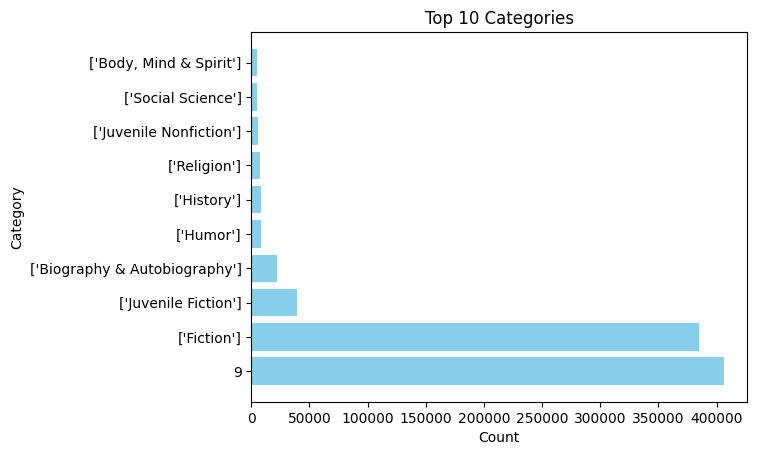

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah kemunculan setiap kategori
category_counts = df_prepros.Category.value_counts()

# Mengambil 10 teratas dan 10 terbawah
category_top = category_counts.head(10)
category_bottom = category_counts.tail(10)

# 10 teratas
plt.barh(category_top.index, category_top.values, color='skyblue')
plt.title('Top 10 Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

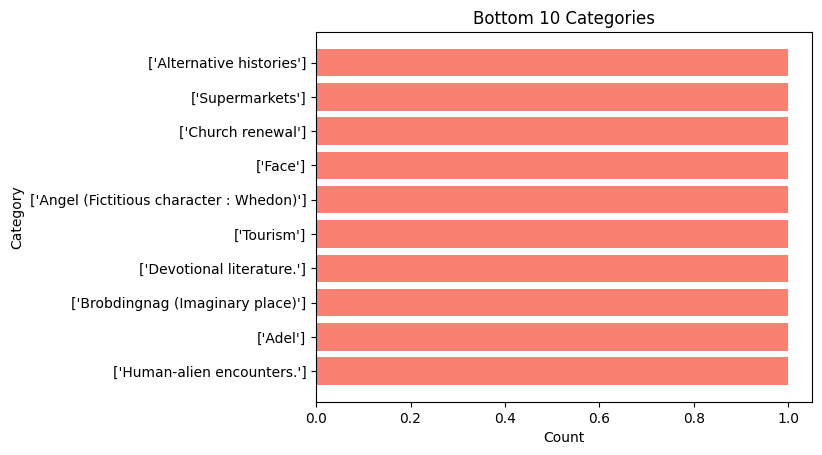

In [ ]:
# 10 terbawah
plt.barh(category_bottom.index, category_bottom.values, color='salmon')
plt.title('Bottom 10 Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

## Data Preprocessing

In [8]:
# Cek ukuran dari dataset kembali
df_prepros.shape

(1031175, 19)

Mengidentifikasi nilai-nilai non-string dan mengambil tindakan yang sesuai untuk membersihkannya.

In [9]:
df_preprocessing = df_prepros

# Memeriksa nilai-nilai non-string
unique_values = df_preprocessing.Category.unique()
non_string_values = [value for value in unique_values if not isinstance(value, str)]
print("Non-string values:", non_string_values)

# Menampilkan jumlah nilai non-string
print("Number of non-string values:", len(non_string_values))

# Menghapus nilai non-string
df_preprocessing.Category = df_preprocessing.Category.str.replace("[", "").str.replace("]", "").str.replace("'", "")

# Menampilkan hasil pembersihan
df_preprocessing.Category.head()

Non-string values: []
Number of non-string values: 0


<ipython-input-9-ed9bc2355527>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_preprocessing.Category = df_preprocessing.Category.str.replace("[", "").str.replace("]", "").str.replace("'", "")


0    Social Science
1         Actresses
2         Actresses
3         Actresses
4         Actresses
Name: Category, dtype: object

Mengidentifikasi nilai yang bukan huruf pada fitur 'Category' dan melakukan tindakan yang sesuai.

In [10]:
# Mencocokkan nilai yang bukan huruf dalam kolom 'Category' kecuali '&' dan ','
non_alphabetic_values = df_preprocessing[df_preprocessing['Category'].str.contains(r'[^a-zA-Z\s&,]')]
non_alphabetic_values.Category

15         1940-1949
16         1940-1949
17         1940-1949
68                 9
69                 9
             ...    
1031161            9
1031163            9
1031167            9
1031172            9
1031174            9
Name: Category, Length: 423417, dtype: object

In [11]:
df_preprocessing = df_preprocessing.drop(non_alphabetic_values.index)

# Memastikan data kembali
df_preprocessing[df_preprocessing.Category.str.contains(r'[^a-zA-Z\s&,]')].Category

Series([], Name: Category, dtype: object)

In [13]:
# Menghapus non-huruf pada fitur book_title
non_alphabetic_values_2 = df_preprocessing[df_preprocessing['book_title'].str.contains(r'[^a-zA-Z\s&,]')]
df_preprocessing = df_preprocessing.drop(non_alphabetic_values_2.index)

In [14]:
# Cek apakah ada data NaN atau tidak
df_preprocessing.isna().sum()

Unnamed: 0                 0
user_id                    0
location                   0
age                        0
isbn                       0
rating                     0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
img_s                      0
img_m                      0
img_l                      0
Summary                    0
Language                   0
Category                   0
city                    3621
state                   5893
country                10305
dtype: int64

In [15]:
# Cek kembali ukuran data setelah pre-processing
df_preprocessing.shape

(288805, 19)

## Data Preparation

### Overview

Dikarenakan terlalu banyak baris dan data yang berbeda pada fitur 'Category', maka pada studi kasus kali ini akan menggunakan 100 data category dengan jumlah data teratas saja, serta hanya mengambil 15 judul dengan index teratas untuk setiap 'Category'-nya

In [16]:
# Menghitung jumlah kemunculan setiap kategori
categoryC = df_preprocessing.Category.value_counts()

# Mengambil 100 kategori teratas
category_counts = categoryC.head(100).index.tolist()

# Menginisialisasi DataFrame kosong untuk menampung hasil
data_cleaned = pd.DataFrame()

# Memfilter data berdasarkan kategori teratas dan membatasi setiap kategori hingga maksimal 15 judul buku berbeda
for catts in category_counts:
    df_catt = df_preprocessing[df_preprocessing.Category == catts]
    title_unique = df_catt['book_title'].unique()[:15]
    data_cleaned = pd.concat([data_cleaned, df_catt[df_catt.book_title.isin(title_unique)]])

# Menampilkan ukuran data yang telah dibersihkan
print(data_cleaned.shape)

(19035, 19)


In [17]:
data_cleaned.Category.value_counts()

Fiction                      5208
Juvenile Fiction              719
FICTION                       600
Humor                         560
Biography & Autobiography     521
                             ... 
Reference                      37
Computers                      35
Christian life                 34
Mathematics                    28
Crafts & Hobbies               19
Name: Category, Length: 100, dtype: int64

In [18]:
# Melihat data dengan index terakhir pada dataframe
data_cleaned.tail()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
45981,45981,261937,"chicago, illinois, usa",34.7439,0553210092,10,The Scarlet Letter,NATHANIEL HAWTHORNE,1965.0,Bantam,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,"Hester Prynne, a young woman in seventeenth ce...",en,Adulteresses,chicago,illinois,usa
45982,45982,263163,"austin, texas, usa",26.0000,0553210092,0,The Scarlet Letter,NATHANIEL HAWTHORNE,1965.0,Bantam,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,"Hester Prynne, a young woman in seventeenth ce...",en,Adulteresses,austin,texas,usa
45983,45983,265313,"morrisville, north carolina, usa",33.0000,0553210092,0,The Scarlet Letter,NATHANIEL HAWTHORNE,1965.0,Bantam,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,"Hester Prynne, a young woman in seventeenth ce...",en,Adulteresses,morrisville,north carolina,usa
45984,45984,267602,"woodinville, washington, usa",34.7439,0553210092,6,The Scarlet Letter,NATHANIEL HAWTHORNE,1965.0,Bantam,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,"Hester Prynne, a young woman in seventeenth ce...",en,Adulteresses,woodinville,washington,usa
45985,45985,277819,"prairieville, louisiana, usa",16.0000,0553210092,0,The Scarlet Letter,NATHANIEL HAWTHORNE,1965.0,Bantam,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,"Hester Prynne, a young woman in seventeenth ce...",en,Adulteresses,prairieville,louisiana,usa


In [19]:
# Inisiasi variabel data_books yang berisi dataframe dengan data yang akan digunakan saja
data_books = data_cleaned.drop(columns=['Unnamed: 0', 'location', 'age', 'img_s', 'img_m', 'img_l', 'Language', 'city', 'state', 'country'])
data_books

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Category
73,8,0771074670,0,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,Another story based in the fictional rural tow...,Fiction
74,11676,0771074670,0,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,Another story based in the fictional rural tow...,Fiction
75,98499,0771074670,0,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,Another story based in the fictional rural tow...,Fiction
76,166596,0771074670,0,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,Another story based in the fictional rural tow...,Fiction
77,189238,0771074670,6,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,Another story based in the fictional rural tow...,Fiction
...,...,...,...,...,...,...,...,...,...
45981,261937,0553210092,10,The Scarlet Letter,NATHANIEL HAWTHORNE,1965.0,Bantam,"Hester Prynne, a young woman in seventeenth ce...",Adulteresses
45982,263163,0553210092,0,The Scarlet Letter,NATHANIEL HAWTHORNE,1965.0,Bantam,"Hester Prynne, a young woman in seventeenth ce...",Adulteresses
45983,265313,0553210092,0,The Scarlet Letter,NATHANIEL HAWTHORNE,1965.0,Bantam,"Hester Prynne, a young woman in seventeenth ce...",Adulteresses
45984,267602,0553210092,6,The Scarlet Letter,NATHANIEL HAWTHORNE,1965.0,Bantam,"Hester Prynne, a young woman in seventeenth ce...",Adulteresses


Merubah data agar menjadi header menjadi **lowercase** dan data bertipe object menjadi **propercase**

In [20]:
# Mengonversi header menjadi proper case
data_books.columns = data_books.columns.str.lower()

# Mengonversi data menjadi proper case
data_books = data_books.apply(lambda x: x.str.title() if x.dtype == "object" else x)
data_books.head()

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher,summary,category
73,8,0771074670,0,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,Another Story Based In The Fictional Rural Tow...,Fiction
74,11676,0771074670,0,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,Another Story Based In The Fictional Rural Tow...,Fiction
75,98499,0771074670,0,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,Another Story Based In The Fictional Rural Tow...,Fiction
76,166596,0771074670,0,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,Another Story Based In The Fictional Rural Tow...,Fiction
77,189238,0771074670,6,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,Another Story Based In The Fictional Rural Tow...,Fiction


In [21]:
# Cek apakah ada missing value
data_books.isna().sum()

user_id                0
isbn                   0
rating                 0
book_title             0
book_author            0
year_of_publication    0
publisher              0
summary                0
category               0
dtype: int64

### Data Preparation: Content Based Filtering

In [ ]:
# Membuat variabel data_cbf yang berisi dataframe data_books
data_cbf = data_books.drop(columns=['user_id'])

# Reindexing kolom pada dataframe
data_cbf = data_cbf.reindex(columns=['isbn','book_title','summary','book_author','publisher','year_of_publication','rating','category'])
data_cbf.head()

,isbn,book_title,summary,book_author,publisher,year_of_publication,rating,category
30,0399135782,The Kitchen God'S Wife,A Chinese Immigrant Who Is Convinced She Is Dy...,Amy Tan,Putnam Pub Group,1991.0,0,Fiction
31,0399135782,The Kitchen God'S Wife,A Chinese Immigrant Who Is Convinced She Is Dy...,Amy Tan,Putnam Pub Group,1991.0,9,Fiction
32,0399135782,The Kitchen God'S Wife,A Chinese Immigrant Who Is Convinced She Is Dy...,Amy Tan,Putnam Pub Group,1991.0,9,Fiction
33,0399135782,The Kitchen God'S Wife,A Chinese Immigrant Who Is Convinced She Is Dy...,Amy Tan,Putnam Pub Group,1991.0,0,Fiction
34,0399135782,The Kitchen God'S Wife,A Chinese Immigrant Who Is Convinced She Is Dy...,Amy Tan,Putnam Pub Group,1991.0,9,Fiction


Mencari rata-rata rating dari setiap judul buku dan menghilangkan data duplikat pada fitur 'book_title'

In [ ]:
# Menghitung rata-rata rating untuk setiap judul buku melalui nilai isbn
avg_rating = data_cbf.groupby('book_title')['rating'].mean().round(1)

# Memetakan rata-rata rating ke DataFrame asli berdasarkan 'book_title'
data_cbf.rating = data_cbf.book_title.map(avg_rating)

print(data_cbf.shape)

(23555, 8)


In [ ]:
# Menghapus data duplikat berdasarkan 'book_title' setelah mengambil rata-rata rating
data_cbf = data_cbf.drop_duplicates(subset='book_title')

print(data_cbf.shape)

(1448, 8)


In [ ]:
# Membuang data duplikat pada variabel data_cbf
data_cbf = data_cbf.drop_duplicates('isbn')
data_cbf.head()

,isbn,book_title,summary,book_author,publisher,year_of_publication,rating,category
30,0399135782,The Kitchen God'S Wife,A Chinese Immigrant Who Is Convinced She Is Dy...,Amy Tan,Putnam Pub Group,1991.0,4.1,Fiction
71,0679425608,Under The Black Flag: The Romance And The Real...,"An Authoritative, Revisionist History Of The G...",David Cordingly,Random House,1996.0,0.0,Fiction
72,074322678X,Where You'Ll Find Me: And Other Stories,"Now Back In Print, Ann Beattie&#39;S Finest Sh...",Ann Beattie,Scribner,2002.0,2.5,Fiction
73,0771074670,Nights Below Station Street,Another Story Based In The Fictional Rural Tow...,David Adams Richards,Emblem Editions,1988.0,1.0,Fiction
95,1881320189,Goodbye To The Buttermilk Sky,A Beautifully Narrated Novel Of Time And Place...,Julia Oliver,River City Pub,1994.0,4.7,Fiction


In [ ]:
# Menampilka rating tertinggi dan terendah
# Nilai rating tertinggi
rating_max = data_cbf.rating.max()

# Nilai rating terendah
rating_min = data_cbf.rating.min()

# Menampilkan hasil
print("Nilai rating tertinggi:", rating_max)
print("Nilai rating terendah:", rating_min)

Nilai rating tertinggi: 10.0
Nilai rating terendah: 0.0


### Data Preparation: Collaborative Filtering

In [22]:
# Mengambil subset DataFrame dengan kolom yang diinginkan dan disimpan pada data_rating
data_rating = data_books[['user_id', 'isbn', 'rating']].copy()

# Mengambil subset DataFrame dengan kolom yang diinginkan dan disimpan pada data_books_new
# Menghapus duplikat berdasarkan 'isbn' dan 'book_title'
data_books_new = data_books[['isbn', 'book_title', 'category']].copy()
data_books_new.drop_duplicates(subset=['isbn', 'book_title'], inplace=True)

# Duplikasi dataframe ke dalam data_cll
data_cll = data_rating
data_cll

,user_id,isbn,rating
73,8,0771074670,0
74,11676,0771074670,0
75,98499,0771074670,0
76,166596,0771074670,0
77,189238,0771074670,6
...,...,...,...
45981,261937,0553210092,10
45982,263163,0553210092,0
45983,265313,0553210092,0
45984,267602,0553210092,6


Mengubah user_id dan isbn menjadi list tanpa nilai yang sama, serta melakukan proses encoding

In [23]:
# Mengubah user_id dan isbn menjadi list tanpa nilai yang sama
user_ids = data_cll.user_id.unique().tolist()
isbn_ids = data_cll.isbn.unique().tolist()

# Melakukan encoding user_id dan encoding angka ke user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

# Melakukan encoding isbn dan encoding angka ke ke isbn
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_ids)}
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_ids)}

print('list user_id: ', user_ids)
print('list isbn: ', isbn_ids)
print('encoded user_id : ', user_to_user_encoded)
print('encoded angka ke user_id: ', user_encoded_to_user)
print('encoded isbn : ', isbn_to_isbn_encoded)
print('encoded angka ke isbn: ', isbn_encoded_to_isbn)

list user_id:  [8, 11676, 98499, 166596, 189238, 223066, 35826, 226745, 9, 243, 388, 2977, 3329, 3363, 5760, 6795, 7346, 7352, 9419, 9747, 9856, 11224, 12685, 12923, 13552, 13582, 14521, 16666, 16795, 17761, 19445, 20435, 20462, 20783, 20801, 20916, 21264, 23511, 23768, 26240, 26544, 26593, 27684, 28123, 28619, 29654, 30487, 30533, 31299, 31315, 31556, 31560, 31694, 32516, 35857, 35859, 36606, 37874, 38718, 38991, 39345, 39646, 40889, 41781, 44663, 45585, 46389, 46398, 46767, 47971, 48268, 48911, 49168, 49994, 52584, 52994, 54005, 54884, 55027, 55419, 55492, 57108, 57423, 57632, 59038, 59390, 60130, 60569, 60683, 62667, 62881, 63470, 64535, 64605, 64679, 66387, 67487, 68256, 68537, 69232, 70205, 70666, 72523, 72912, 72975, 74709, 75691, 75819, 76352, 76368, 76942, 78165, 78754, 78834, 78973, 79186, 79740, 80810, 81088, 81298, 82114, 82893, 83034, 84024, 84611, 85534, 86303, 86969, 87257, 87929, 88006, 90322, 91633, 91832, 93055, 93363, 93643, 93772, 93800, 94074, 94139, 94396, 97721, 9

In [24]:
## Petakan user_id dan isbn ke dataframe yang berkaitan.

# Mapping user_id ke dataframe user
data_cll['user'] = data_cll['user_id'].map(user_to_user_encoded)

# Mapping isbn ke dataframe isbn_n
data_cll['isbn_n'] = data_cll['isbn'].map(isbn_to_isbn_encoded)
data_cll

,user_id,isbn,rating,user,isbn_n
73,8,0771074670,0,0,0
74,11676,0771074670,0,1,0
75,98499,0771074670,0,2,0
76,166596,0771074670,0,3,0
77,189238,0771074670,6,4,0
...,...,...,...,...,...
45981,261937,0553210092,10,9471,1492
45982,263163,0553210092,0,408,1492
45983,265313,0553210092,0,413,1492
45984,267602,0553210092,6,9472,1492


In [25]:
## cek beberapa hal dalam data

# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)

# Mendapatkan jumlah isbn
num_isbn = len(isbn_encoded_to_isbn)

# Mengubah rating menjadi nilai float
data_cll['rating'] = data_cll['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(data_cll['rating'])

# Nilai maksimal rating
max_rating = max(data_cll['rating'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'
  .format(
    num_users, num_isbn, min_rating, max_rating
))

Number of User: 9474, Number of Resto: 1493, Min Rating: 0.0, Max Rating: 10.0


In [26]:
# Mengacak dataset
data_cll = data_cll.sample(frac=1, random_state=42)
data_cll

,user_id,isbn,rating,user,isbn_n
262759,55548,006109868X,0.0,2889,21
496630,13347,8483100711,0.0,7704,731
1011282,243899,055321246X,8.0,7176,499
415,211321,0440234743,8.0,324,2
237658,15270,0552998486,0.0,8454,996
...,...,...,...,...,...
361425,267568,0553227750,0.0,7007,436
493309,37185,0452269806,0.0,7234,540
28481,8253,014230218X,8.0,3330,36
1198,49335,0971880107,0.0,844,3


In [27]:
# Membuat variabel x untuk mencocokkan data user dan isbn menjadi satu value
x = data_cll[['user', 'isbn_n']].values

# Membuat variabel y untuk membuat rating dari hasil
y = data_cll['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Split dataset menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data_cll.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
print(x, y)

[[2889   21]
 [7704  731]
 [7176  499]
 ...
 [3330   36]
 [ 844    3]
 [8535 1002]] [0.  0.  0.8 ... 0.8 0.  0.6]


## Modelling

### Modelling: Content Based Filtering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data category
tf.fit(data_cbf['category'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['abortion', 'activities', 'actors', 'adolescence', 'adult',
       'adultery', 'adventure', 'adventurers', 'african', 'american',
       'americans', 'and', 'animals', 'antiques', 'architecture', 'art',
       'arts', 'australia', 'authors', 'autobiography', 'babysitters',
       'bible', 'biography', 'body', 'boys', 'britain', 'brothers',
       'business', 'businessmen', 'california', 'cats', 'christian',
       'christmas', 'city', 'collectibles', 'collections', 'comics',
       'computers', 'conduct', 'cooking', 'crafts', 'crime', 'criticism',
       'detective', 'diary', 'disciplines', 'dogs', 'domestic', 'drama',
       'economics', 'education', 'engineering', 'england', 'english',
       'families', 'family', 'fantasy', 'fathers', 'fiction', 'fitness',
       'foreign', 'france', 'friendship', 'games', 'gardening', 'german',
       'graphic', 'great', 'health', 'history', 'hobbies', 'home',
       'horror', 'house', 'humor', 'intelligence', 'juvenile', 'language',
       

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data_cbf.category)

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(713, 121)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis category
# Baris diisi dengan judul buku

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data_cbf.book_title
).sample(22, axis=1).sample(10, axis=0)

,games,businessmen,actors,california,families,law,study,service,german,babysitters,...,crafts,autobiography,architecture,domestic,business,christmas,humor,adultery,political,animals
book_title,,,,,,,,,,,,,,,,,,,,,
How To Change Your Life,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Death Of Long Steam Lady,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Ultimate Maze Book,0.668785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Deadliest Game (Tom Clancy'S Net Force; Young Adult),0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Up To Low,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
More Momilies: As My Mother Used To Say...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
How To Survive Middle School A Humorous Guide To The Wonder Years: A Humorous Guide To The Wonder Years (Get 'Em Growing),0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Articulate Mammal: An Introduction To Psycholinguistics,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Three Musketeers (Puffin Classics),0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# mengidentifikasi korelasi antara judul buku dengan kategorinya.
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_cbf.book_title, columns=data_cbf.book_title)
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (713, 713)


book_title,Same-Sex Love : And The Path To Wholeness,Dark Star Safari : Overland From Cairo To Capetown,To The Lighthouse (Essential.Penguin S.),"Resist Or Serve (The Official Guide To The X-Files, Vol. 4)",Asta'S Book
book_title,,,,,
Dave Barry In Cyberspace,0.0,0.0,0.000000,0.0,0.000000
"The Vantage Point;: Perspectives Of The Presidency, 1963-1969",0.0,0.0,0.000000,0.0,0.000000
Coming Attractions,0.0,0.0,0.000000,0.0,0.000000
The Snow Leopard (Penguin Nature Classics),0.0,0.0,0.000000,0.0,0.000000
Goodbye To The Buttermilk Sky,0.0,0.0,0.499252,0.0,0.000000
Desert Notes/River Notes,0.0,0.0,0.000000,0.0,0.000000
Illusions,0.0,0.0,0.000000,0.0,0.290615
Set Your Voice Free : Foreword By Dr. Laura Schlesinger,0.0,0.0,0.000000,0.0,0.000000
"The Know-It-All'S Guide To Life: How To Climb Mount Everest, Cure Hiccups, Live To 100, And Dozens Of Other Practical, Unusual, Or Just Plain Fantastical Things",0.0,0.0,0.000000,0.0,0.000000


In [ ]:
def book_recommendations(book_title,
                         k,
                         similarity_data=cosine_sim_df,
                         items=data_cbf[['book_title', 'summary', 'book_author', 'rating', 'category']],
                         ):

    # Mengambil data dengan menggunakan argpartition
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop book_title agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(book_title, errors='ignore')

    # Mengurutkan items berdasarkan rating tertinggi
    recommendations = pd.DataFrame(closest).merge(items.sort_values(by='rating', ascending=False)).head(k)

    return recommendations

In [ ]:
# Selanjutnya, mari kita terapkan kode di atas untuk menemukan rekomendasi restoran yang mirip dengan KFC.
data_cbf[data_cbf.book_title.eq('Death Of Long Steam Lady')]

,isbn,book_title,summary,book_author,publisher,year_of_publication,rating,category
361524,0931122422,Death Of Long Steam Lady,&Quot;Nellie Wong&#39;S New Text Fuses A Stark...,Nellie Wong,West End Press,1986.0,8.0,American Poetry


In [ ]:
# Mendapatkan rekomendasi buku yang mirip dengan 'Death Of Long Steam Lady'
book_recommendations('Death Of Long Steam Lady', 7)

,book_title,summary,book_author,rating,category
0,Miles Of Smiles,Humorous Poems Divided Into Catagories Such As...,Bruce Lansky,8.5,American Poetry
1,Jim Morrison: Lords And New Creatures,Jim Morrison Was One Of The Most Erudite And W...,James Morrison,7.0,American Poetry
2,Sing A Song Of Popcorn: Every Child'S Book Of ...,A Collection Of 128 Poems By A Variety Of Well...,Beatrice Schenk De Regniers,8.0,American Poetry
3,The Collected Poems Of Weldon Kees,Of The Three Volumes Of Poetry Published By We...,Donald Justice,6.0,American Poetry
4,Walt Whitman: The Complete Poems (Penguin Clas...,A Collection Of Many Of Whitman&#39;S Works.,Francis Murphy,3.3,American Poetry
5,Robert Frost (The Great American Poets),From The Great Poets Series--Exquisite Small-F...,Peter Porter,6.7,American Poetry
6,Its Thanksgiving,From The First Thanksgiving Feast To Daddys Fo...,Jack Prelutsky,4.0,American Poetry


### Modelling: Collaborative Filtering

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [29]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_isbn_n, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_isbn_n = num_isbn_n
    self.embedding_size = embedding_size
    # layer embedding user
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    # layer embedding user bias
    self.user_bias = layers.Embedding(num_users, 1)
    self.isbn_n_embedding = layers.Embedding(
        # layer embeddings isbn
        num_isbn_n,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    # layer embedding isbn bias
    self.isbn_n_bias = layers.Embedding(num_isbn_n, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    isbn_n_vector = self.isbn_n_embedding(inputs[:, 1]) # memanggil layer embedding 3
    isbn_n_bias = self.isbn_n_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_isbn_n = tf.tensordot(user_vector, isbn_n_vector, 2)

    x = dot_user_isbn_n + user_bias + isbn_n_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [30]:
## Proses compile terhadap model.

model = RecommenderNet(num_users, num_isbn, 50) # inisialisasi model

# Model compile
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.MeanSquaredError(),  # Metrik MSE
        tf.keras.metrics.Precision(),         # Metrik Presisi
        tf.keras.metrics.Recall()             # Metrik Recall
    ]
)

In [31]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 20,
    validation_data = (x_val, y_val),
)

Epoch 1/20
476/476 [==============================] - 7s 12ms/step - loss: 0.6735 - mean_squared_error: 0.1852 - precision: 0.4501 - recall: 0.2719 - val_loss: 0.6445 - val_mean_squared_error: 0.1728 - val_precision: 0.6667 - val_recall: 0.0191
Epoch 2/20
476/476 [==============================] - 4s 8ms/step - loss: 0.5846 - mean_squared_error: 0.1438 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6314 - val_mean_squared_error: 0.1665 - val_precision: 0.6531 - val_recall: 0.0655
Epoch 3/20
476/476 [==============================] - 3s 6ms/step - loss: 0.5733 - mean_squared_error: 0.1392 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6237 - val_mean_squared_error: 0.1630 - val_precision: 0.6380 - val_recall: 0.1419
Epoch 4/20
476/476 [==============================] - 4s 9ms/step - loss: 0.5634 - mean_squared_error: 0.1351 - precision: 0.8000 - recall: 0.0014 - val_loss: 0.6169 - val_mean_squared_error: 0.1600 - val_precision: 0.6351 - val_recall: 0.2196
Epoch 5

In [34]:
print("mse: ", history.history['mean_squared_error'])
print("val mse: ", history.history['mean_squared_error'])
print("precision: ", history.history['precision'])
print("val precision: ", history.history['val_precision'])
print("recall: ", history.history['recall'])
print("val recall: ", history.history['val_recall'])
import matplotlib.pyplot as plt

mse:  [0.1851954162120819, 0.14379563927650452, 0.13920824229717255, 0.13512946665287018, 0.13167159259319305, 0.12820160388946533, 0.12562498450279236, 0.1225375086069107, 0.12060347944498062, 0.11723856627941132, 0.115561343729496, 0.11261885613203049, 0.11139633506536484, 0.10824884474277496, 0.10688873380422592, 0.10404731333255768, 0.1030702143907547, 0.10169944167137146, 0.09947279095649719, 0.09757038950920105]
val mse:  [0.1851954162120819, 0.14379563927650452, 0.13920824229717255, 0.13512946665287018, 0.13167159259319305, 0.12820160388946533, 0.12562498450279236, 0.1225375086069107, 0.12060347944498062, 0.11723856627941132, 0.115561343729496, 0.11261885613203049, 0.11139633506536484, 0.10824884474277496, 0.10688873380422592, 0.10404731333255768, 0.1030702143907547, 0.10169944167137146, 0.09947279095649719, 0.09757038950920105]
precision:  [0.4501127302646637, 0.0, 0.0, 0.800000011920929, 0.828125, 0.8733333349227905, 0.8723404407501221, 0.8546637892723083, 0.8595848679542542, 

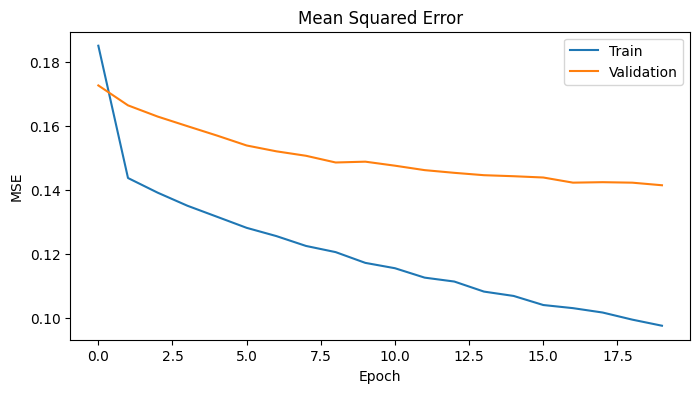

In [35]:
# Visualisasi Mean Squared Error
plt.figure(figsize=(8, 4))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

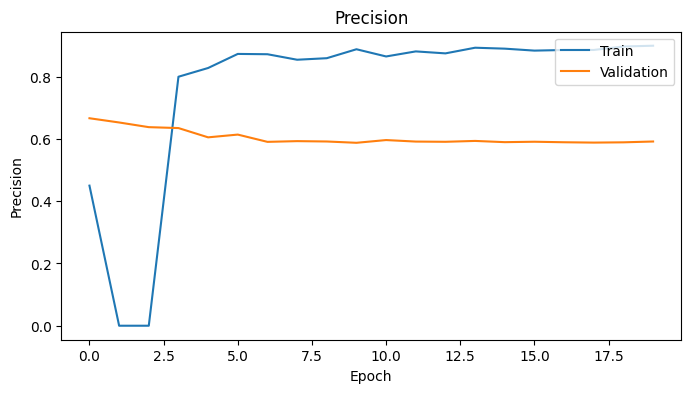

In [36]:
# Visualisasi Precision
plt.figure(figsize=(8, 4))
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

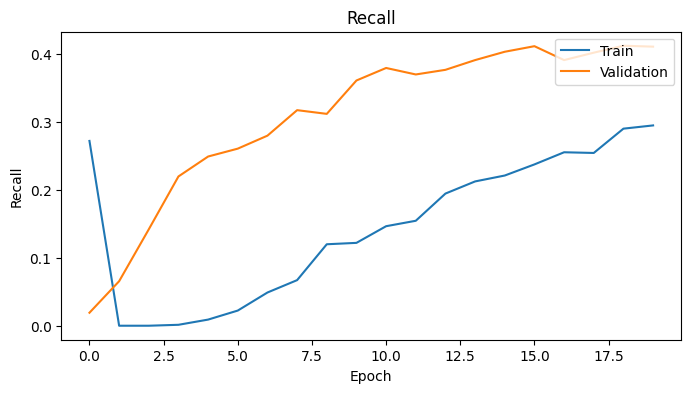

In [37]:
# Visualisasi Recall
plt.figure(figsize=(8, 4))
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

#### Rekomendasi dengan predict() dari library keras

In [38]:
# Mengambil sample user
user_id = data_rating.user_id.sample(1).iloc[0]
book_review_by_user = data_rating[data_rating.user_id == user_id]

book_not_review = data_books_new[~data_books_new['isbn'].isin(book_review_by_user.isbn.values)]['isbn']
book_not_review = list(
    set(book_not_review)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)

book_not_review = [[isbn_to_isbn_encoded.get(x)] for x in book_not_review]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(book_not_review), book_not_review)
)

In [43]:
ratings = model.predict(user_resto_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    isbn_encoded_to_isbn.get(book_not_review[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 12)
print('Book with high ratings from user')
print('===' * 12)

top_books_user = (
    book_review_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .isbn.values
)

book_df_rows = data_books_new[data_books_new['isbn'].isin(top_books_user)]
for row in book_df_rows.itertuples():
    print(row.book_title, ':', row.category)

print('---' * 12)
print('Top 10 Book Recommendation')
print('---' * 12)

recommended_resto = data_books_new[data_books_new['isbn'].isin(recommended_book_ids)]
for row in recommended_resto.itertuples():
    print(row.book_title, ':', row.category)

47/47 [==============================] - 0s 2ms/step
Showing recommendations for users: 233579
Book with high ratings from user
Wild Animus : Fiction
------------------------------------
Top 10 Book Recommendation
------------------------------------
The Little Prince : Juvenile Fiction
Falling Up : Juvenile Nonfiction
Child Is Born, A : Family & Relationships
Westward The Tide : Fiction
La Sonrisa Etrusca : Drama
The Control Of Nature : Nature
El Principito : Fantasy
The Secret Life Of Bees : African American Women
The Last Day Of Summer : Photography
Native Son : African American Men
